*Agenda:*
1. Data wrangling
2. Plotting
3. Exploratory data analysis

In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

#### Reading the raw data

In [3]:
sales0 = pd.read_csv("data/superstore_sales.csv")

In [4]:
sales0.head()

,Order ID,Order Date,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,Unit Price,Shipping Cost,Customer Name,Province,Region,Customer Segment,Product Category,Product Sub-Category,Product Base Margin,Ship Date
0,3,13-10-2010,Low,6,261.5400,0.04,Regular Air,-213.25,38.94,35.00,Muhammed MacIntyre,Nunavut,Nunavut,Small Business,Office Supplies,Storage & Organization,0.80,20-10-2010
1,293,01-10-2012,High,49,10123.0200,0.07,Delivery Truck,457.81,208.16,68.02,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,0.58,02-10-2012
2,293,01-10-2012,High,27,244.5700,0.01,Regular Air,46.71,8.69,2.99,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Binders and Binder Accessories,0.39,03-10-2012
3,483,10-07-2011,High,30,4965.7595,0.08,Regular Air,1198.97,195.99,3.99,Clay Rozendal,Nunavut,Nunavut,Corporate,Technology,Telephones and Communication,0.58,12-07-2011
4,515,28-08-2010,Not Specified,19,394.2700,0.08,Regular Air,30.94,21.78,5.94,Carlos Soltero,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,0.50,30-08-2010


In [5]:
sales0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8399 entries, 0 to 8398
Data columns (total 18 columns):
Order ID                8399 non-null int64
Order Date              8399 non-null object
Order Priority          8399 non-null object
Order Quantity          8399 non-null int64
Sales                   8399 non-null float64
Discount                8399 non-null float64
Ship Mode               8399 non-null object
Profit                  8399 non-null float64
Unit Price              8399 non-null float64
Shipping Cost           8399 non-null float64
Customer Name           8399 non-null object
Province                8399 non-null object
Region                  8399 non-null object
Customer Segment        8399 non-null object
Product Category        8399 non-null object
Product Sub-Category    8399 non-null object
Product Base Margin     8336 non-null float64
Ship Date               8399 non-null object
dtypes: float64(6), int64(2), object(10)
memory usage: 1.2+ MB


#### Drop records where Product Base Margin is missing

In [6]:
sales1 = sales0[~sales0.isnull()]

In [7]:
sales1 = sales0.dropna(subset=["Product Base Margin"])
sales1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8336 entries, 0 to 8398
Data columns (total 18 columns):
Order ID                8336 non-null int64
Order Date              8336 non-null object
Order Priority          8336 non-null object
Order Quantity          8336 non-null int64
Sales                   8336 non-null float64
Discount                8336 non-null float64
Ship Mode               8336 non-null object
Profit                  8336 non-null float64
Unit Price              8336 non-null float64
Shipping Cost           8336 non-null float64
Customer Name           8336 non-null object
Province                8336 non-null object
Region                  8336 non-null object
Customer Segment        8336 non-null object
Product Category        8336 non-null object
Product Sub-Category    8336 non-null object
Product Base Margin     8336 non-null float64
Ship Date               8336 non-null object
dtypes: float64(6), int64(2), object(10)
memory usage: 1.2+ MB


Reset the index of the dataframe

In [9]:
sales1.reset_index(drop=True, inplace=True)

In [10]:
sales1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8336 entries, 0 to 8335
Data columns (total 18 columns):
Order ID                8336 non-null int64
Order Date              8336 non-null object
Order Priority          8336 non-null object
Order Quantity          8336 non-null int64
Sales                   8336 non-null float64
Discount                8336 non-null float64
Ship Mode               8336 non-null object
Profit                  8336 non-null float64
Unit Price              8336 non-null float64
Shipping Cost           8336 non-null float64
Customer Name           8336 non-null object
Province                8336 non-null object
Region                  8336 non-null object
Customer Segment        8336 non-null object
Product Category        8336 non-null object
Product Sub-Category    8336 non-null object
Product Base Margin     8336 non-null float64
Ship Date               8336 non-null object
dtypes: float64(6), int64(2), object(10)
memory usage: 1.1+ MB


## Begin analyses 

Which `Product Sub-Category` has the highest number of records?

In [11]:
sales1['Product Sub-Category'].value_counts().head(10)

Paper                             1225
Binders and Binder Accessories     915
Telephones and Communication       883
Office Furnishings                 788
Computer Peripherals               758
Pens & Art Supplies                633
Storage & Organization             525
Appliances                         434
Chairs & Chairmats                 360
Tables                             349
Name: Product Sub-Category, dtype: int64

Which are the top 10 Product Sub-Categories in terms of total sales?

Hint: use groupby, sum the sales values, then sort by descreasing sales, pick top 10 using head

In [12]:
res = sales1.groupby(['Product Sub-Category'])[["Sales"]].sum()

In [14]:
type(res)

pandas.core.frame.DataFrame

In [13]:
res

,Sales
Product Sub-Category,
Appliances,736991.540
Binders and Binder Accessories,1022957.590
Bookcases,814425.900
Chairs & Chairmats,1652823.000
Computer Peripherals,795875.940
Copiers and Fax,1130361.300
Envelopes,174085.800
Labels,38981.550
Office Furnishings,698093.810


In [15]:
res.sort_values(by = "Sales", ascending=False).head(10)

,Sales
Product Sub-Category,
Office Machines,2168697.140
Telephones and Communication,1889313.802
Tables,1786776.752
Chairs & Chairmats,1652823.000
Copiers and Fax,1130361.300
Storage & Organization,1028240.760
Binders and Binder Accessories,1022957.590
Bookcases,814425.900
Computer Peripherals,795875.940


Visual analyses as well

In [16]:
sales_top10 = res.sort_values(by = "Sales", ascending=False).head(10)

In [17]:
type(sales_top10)

pandas.core.frame.DataFrame

In [18]:
sales_top10

,Sales
Product Sub-Category,
Office Machines,2168697.140
Telephones and Communication,1889313.802
Tables,1786776.752
Chairs & Chairmats,1652823.000
Copiers and Fax,1130361.300
Storage & Organization,1028240.760
Binders and Binder Accessories,1022957.590
Bookcases,814425.900
Computer Peripherals,795875.940


Bar plot for the sales per category

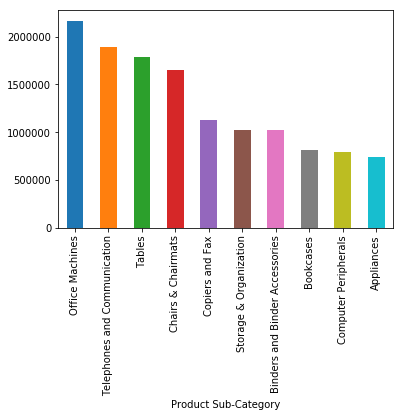

In [19]:
sales_top10.Sales.plot(kind="bar")

In [29]:
sales_top10.reset_index(inplace=True)

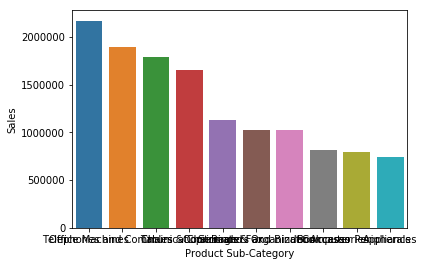

In [30]:
sns.barplot(x = sales_top10['Product Sub-Category'], y = sales_top10['Sales'])

In [31]:
sales1.Sales.describe()

count     8336.000000
mean      1757.100276
std       3576.433039
min          2.240000
25%        141.971625
50%        442.740000
75%       1678.515000
max      89061.050000
Name: Sales, dtype: float64

Plot the histogram for Sales

1. Using the plot method for series in Pandas

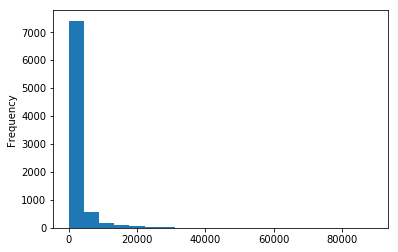

In [39]:
sales1.Sales.plot.hist(20)

2. Using histogram from matplotlib.pyplot

In [40]:
import matplotlib.pyplot as plt

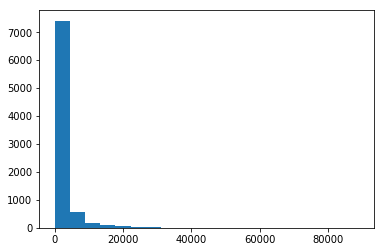

In [42]:
plt.hist(sales1.Sales, bins=20)
plt.show()

3. Using seaborn

In [43]:
import seaborn as sns

C:\Users\rahim.baig\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


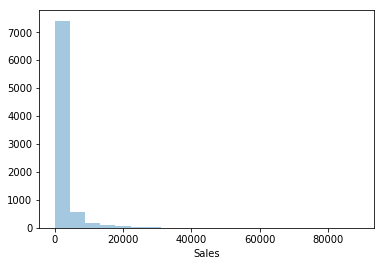

In [46]:
sns.distplot(sales1.Sales, kde=False, bins=20)

In [49]:
sales1.Sales.quantile(0.95)

7805.26

Outliers! 
 - Extremely high values, big deviations from the usual/regular values

#### Box plots are a better way to find outliers

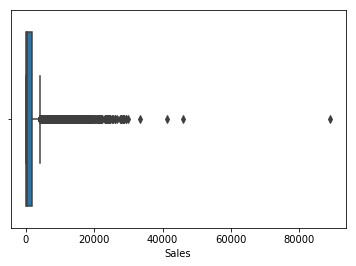

In [50]:
sns.boxplot(sales1.Sales)

#### Removing the outliers in Sales
 - drop records with Sales more than 3000

In [55]:
sales2 = sales1[sales1.Sales<=3000]

In [56]:
sales2.reset_index(inplace=True, drop=True)

In [57]:
sales2.shape

(7007, 18)

Plot the seaborn histogram once again

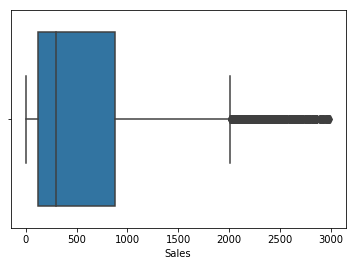

In [58]:
sns.boxplot(sales2.Sales)

C:\Users\rahim.baig\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\rahim.baig\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


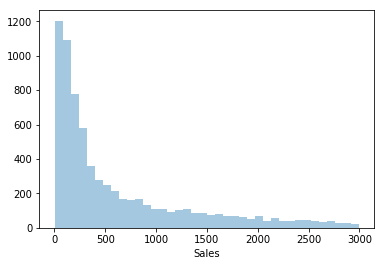

In [59]:
sns.distplot(sales2.Sales, kde=False)

Get median sales per 'Product Category' and plot

In [62]:
sales2.columns

Index(['Order ID', 'Order Date', 'Order Priority', 'Order Quantity', 'Sales',
       'Discount', 'Ship Mode', 'Profit', 'Unit Price', 'Shipping Cost',
       'Customer Name', 'Province', 'Region', 'Customer Segment',
       'Product Category', 'Product Sub-Category', 'Product Base Margin',
       'Ship Date'],
      dtype='object')

In [71]:
res = sales2.groupby(['Region', 'Product Sub-Category'])[['Sales']].median()

In [72]:
res.reset_index(inplace=True)

In [73]:
res.head()

,Region,Product Sub-Category,Sales
0,Atlantic,Appliances,553.490
1,Atlantic,Binders and Binder Accessories,225.250
2,Atlantic,Bookcases,1386.650
3,Atlantic,Chairs & Chairmats,1111.225
4,Atlantic,Computer Peripherals,551.180


In [76]:
res_location= res.sort_values(by = ['Region', 'Sales'], ascending=[True, False])
res_location.head()

,Region,Product Sub-Category,Sales
5,Atlantic,Copiers and Fax,2361.10000
15,Atlantic,Tables,1558.88500
2,Atlantic,Bookcases,1386.65000
3,Atlantic,Chairs & Chairmats,1111.22500
16,Atlantic,Telephones and Communication,1062.06225


In [77]:
res_location[res_location.Region == "Nunavut"].head()

,Region,Product Sub-Category,Sales
36,Nunavut,Chairs & Chairmats,1266.720
37,Nunavut,Computer Peripherals,1181.930
46,Nunavut,Telephones and Communication,834.904
45,Nunavut,Tables,663.784
35,Nunavut,Bookcases,544.410


In [78]:
res_location[res_location.Region == "Atlantic"].head()

,Region,Product Sub-Category,Sales
5,Atlantic,Copiers and Fax,2361.10000
15,Atlantic,Tables,1558.88500
2,Atlantic,Bookcases,1386.65000
3,Atlantic,Chairs & Chairmats,1111.22500
16,Atlantic,Telephones and Communication,1062.06225


In [79]:
res = sales2.groupby(['Product Sub-Category'])[['Sales']].median()

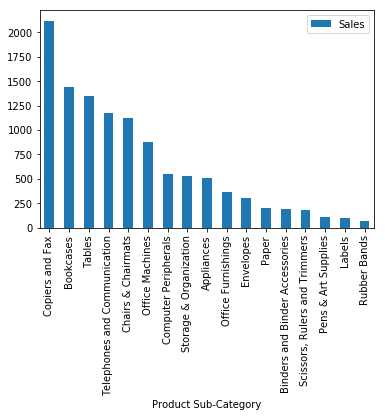

In [80]:
res.sort_values(by="Sales", ascending=False).plot(kind="bar")

Can we draw a box plot, for each product category?

In [82]:
sales2.groupby(['Product Category'])[['Sales']].median()

,Sales
Product Category,
Furniture,565.9100
Office Supplies,192.2300
Technology,834.2155


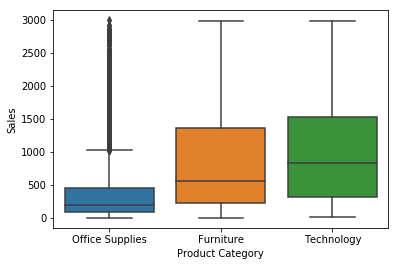

In [81]:
sns.boxplot(x=sales2['Product Category'], y=sales2.Sales)

In [83]:
?sns.boxplot

In [86]:
sales2.columns

Index(['Order ID', 'Order Date', 'Order Priority', 'Order Quantity', 'Sales',
       'Discount', 'Ship Mode', 'Profit', 'Unit Price', 'Shipping Cost',
       'Customer Name', 'Province', 'Region', 'Customer Segment',
       'Product Category', 'Product Sub-Category', 'Product Base Margin',
       'Ship Date'],
      dtype='object')

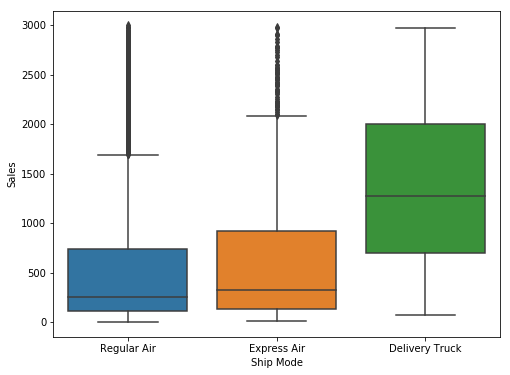

In [90]:
plt.figure(figsize=[8,6])
sns.boxplot(x=sales2['Ship Mode'], y=sales2.Sales, orient="v")

### Numerical to numerical association

Scatter plot

Shipping Cost  
Sales  
Profit

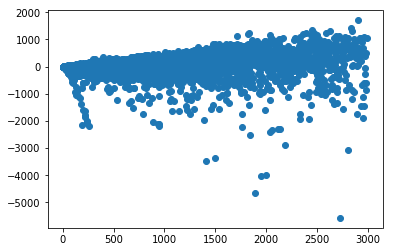

In [92]:
plt.scatter(x=sales2.Sales, y=sales2.Profit)

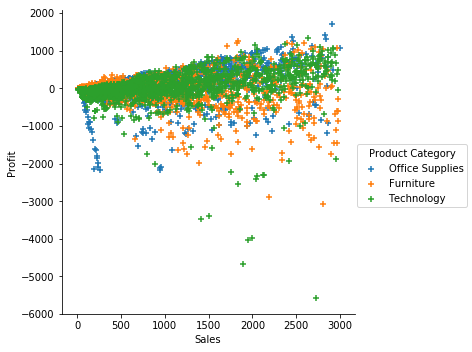

In [94]:
sns.pairplot(data = sales2, x_vars=['Sales'], y_vars=['Profit'], hue='Product Category', size=5, markers="+")

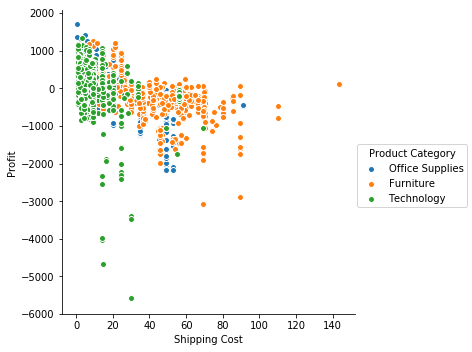

In [95]:
sns.pairplot(data = sales2, x_vars=['Shipping Cost'], y_vars=['Profit'], hue='Product Category', size=5)

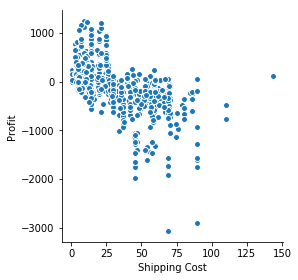

In [96]:
sns.pairplot(data=sales2[sales2['Product Category']=="Furniture"], x_vars=['Shipping Cost'], y_vars=['Profit'], size=4)

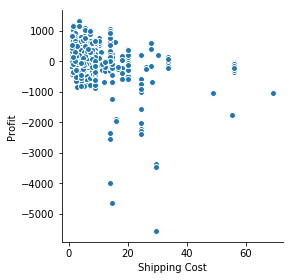

In [97]:
sns.pairplot(data=sales2[sales2['Product Category']=="Technology"], x_vars=['Shipping Cost'], y_vars=['Profit'], size=4)

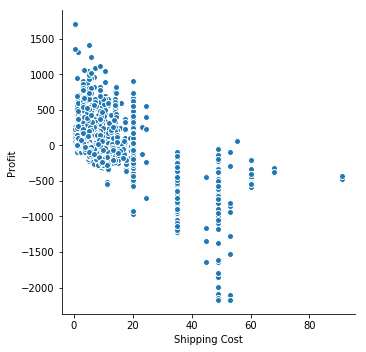

In [98]:
sns.pairplot(data=sales2[sales2['Product Category']=="Office Supplies"], x_vars=['Shipping Cost'], y_vars=['Profit'], size=5)

In [99]:
data_offsupplies = sales2[sales2['Product Category']=="Office Supplies"]

In [100]:
?sns.regplot

C:\Users\rahim.baig\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


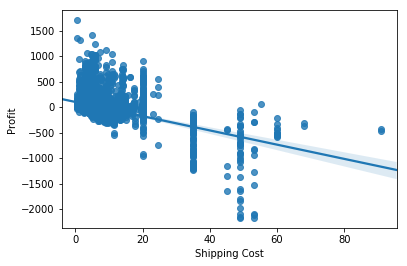

In [101]:
sns.regplot(data_offsupplies['Shipping Cost'], data_offsupplies.Profit)

C:\Users\rahim.baig\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


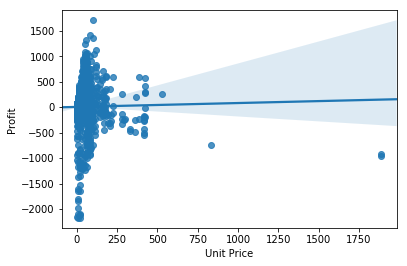

In [104]:
sns.regplot(data_offsupplies['Unit Price'], data_offsupplies.Profit)

In [102]:
data_offsupplies.describe()

,Order ID,Order Quantity,Sales,Discount,Profit,Unit Price,Shipping Cost,Product Base Margin
count,4329.000000,4329.000000,4329.000000,4329.000000,4329.000000,4329.000000,4329.000000,4329.000000
mean,30181.407946,25.244398,402.150603,0.050139,6.257665,20.804116,6.746362,0.455606
std,17352.362936,14.360437,527.437748,0.031574,244.825664,56.922392,8.354162,0.121319
min,3.000000,1.000000,2.240000,0.000000,-2175.090000,1.140000,0.490000,0.350000
25%,15109.000000,13.000000,88.700000,0.020000,-58.330000,4.760000,1.790000,0.370000
50%,30308.000000,25.000000,192.230000,0.050000,-5.650000,7.280000,5.190000,0.390000
75%,44869.000000,38.000000,463.000000,0.080000,41.330000,19.980000,7.640000,0.560000
max,59971.000000,50.000000,2996.930000,0.100000,1704.000000,1889.990000,91.050000,0.850000


In [113]:
cols = ['Sales', 'Profit', 'Unit Price', 'Shipping Cost', 'Ship Mode']

C:\Users\rahim.baig\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


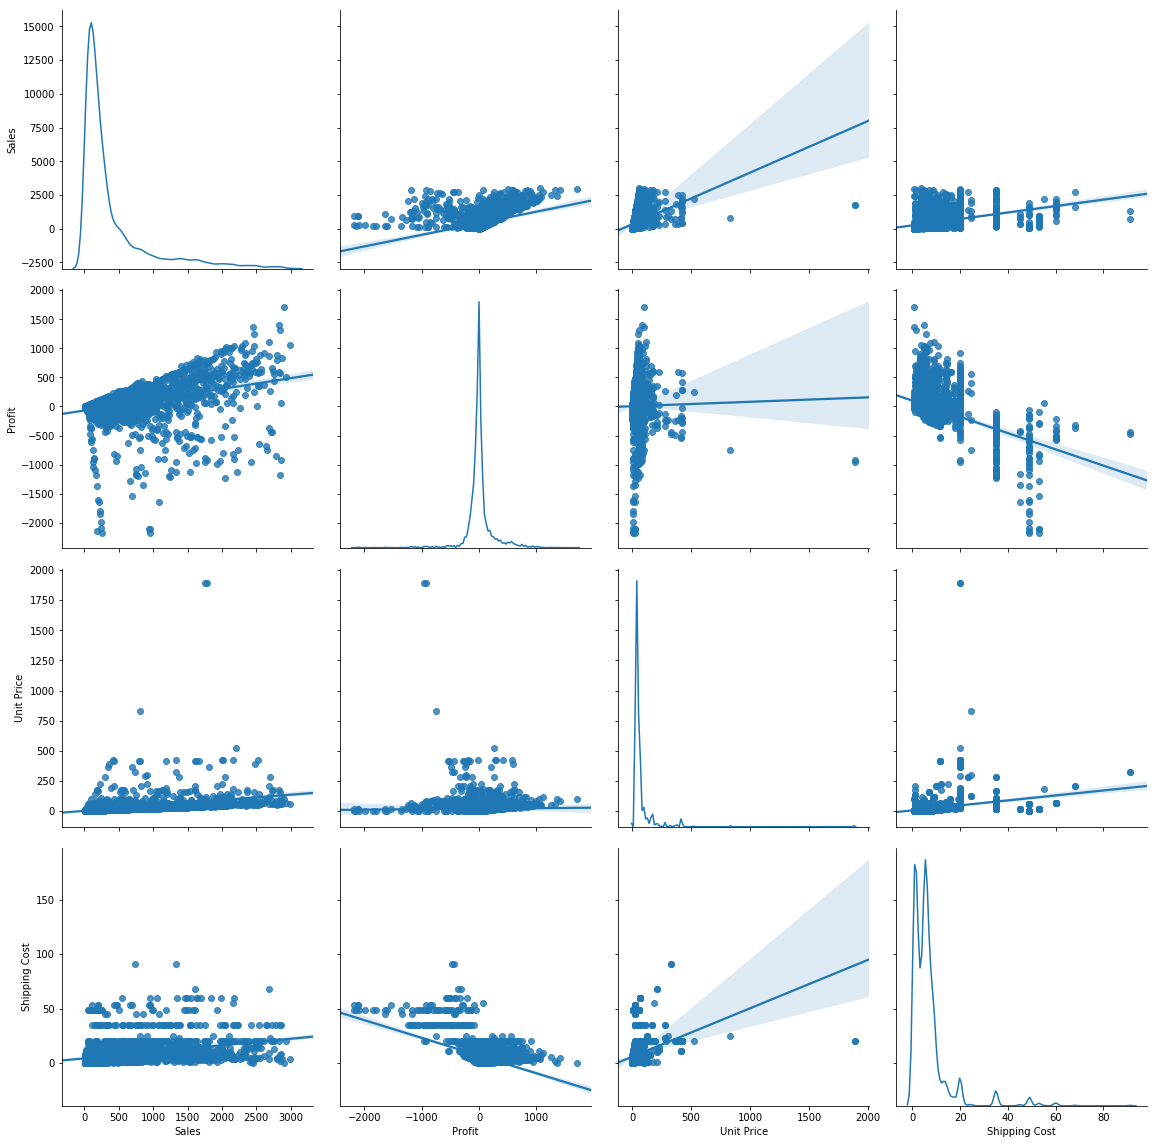

In [114]:
sns.pairplot(data_offsupplies[cols], kind="reg", diag_kind="kde", size=4)

C:\Users\rahim.baig\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


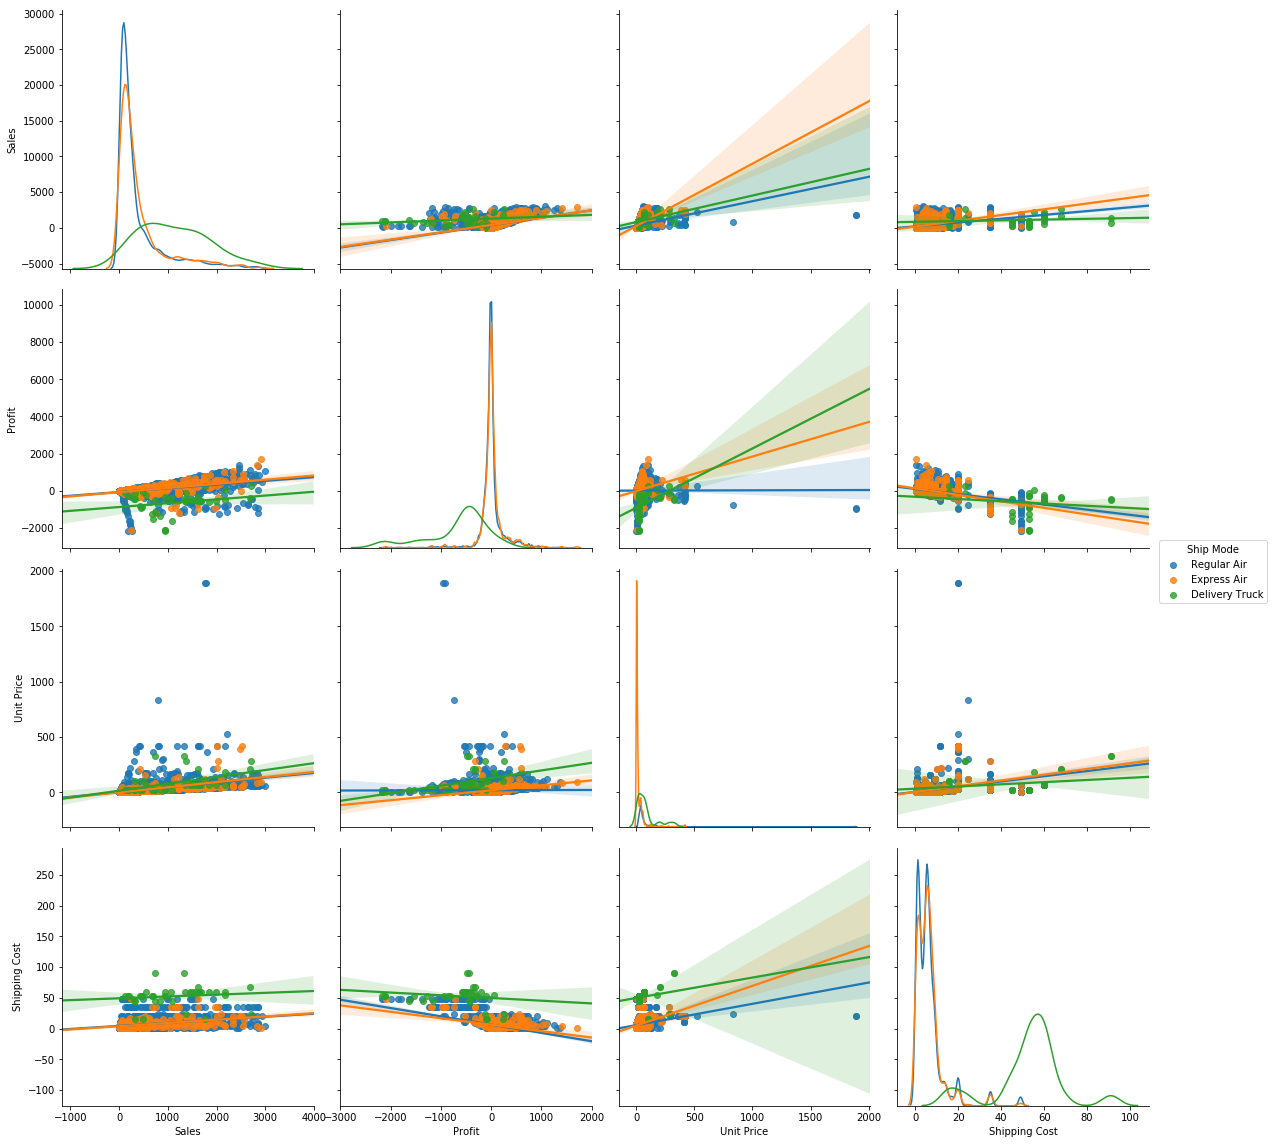

In [119]:
sns.pairplot(data_offsupplies[cols], kind="reg", diag_kind="kde", size=4, hue = 'Ship Mode')

C:\Users\rahim.baig\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


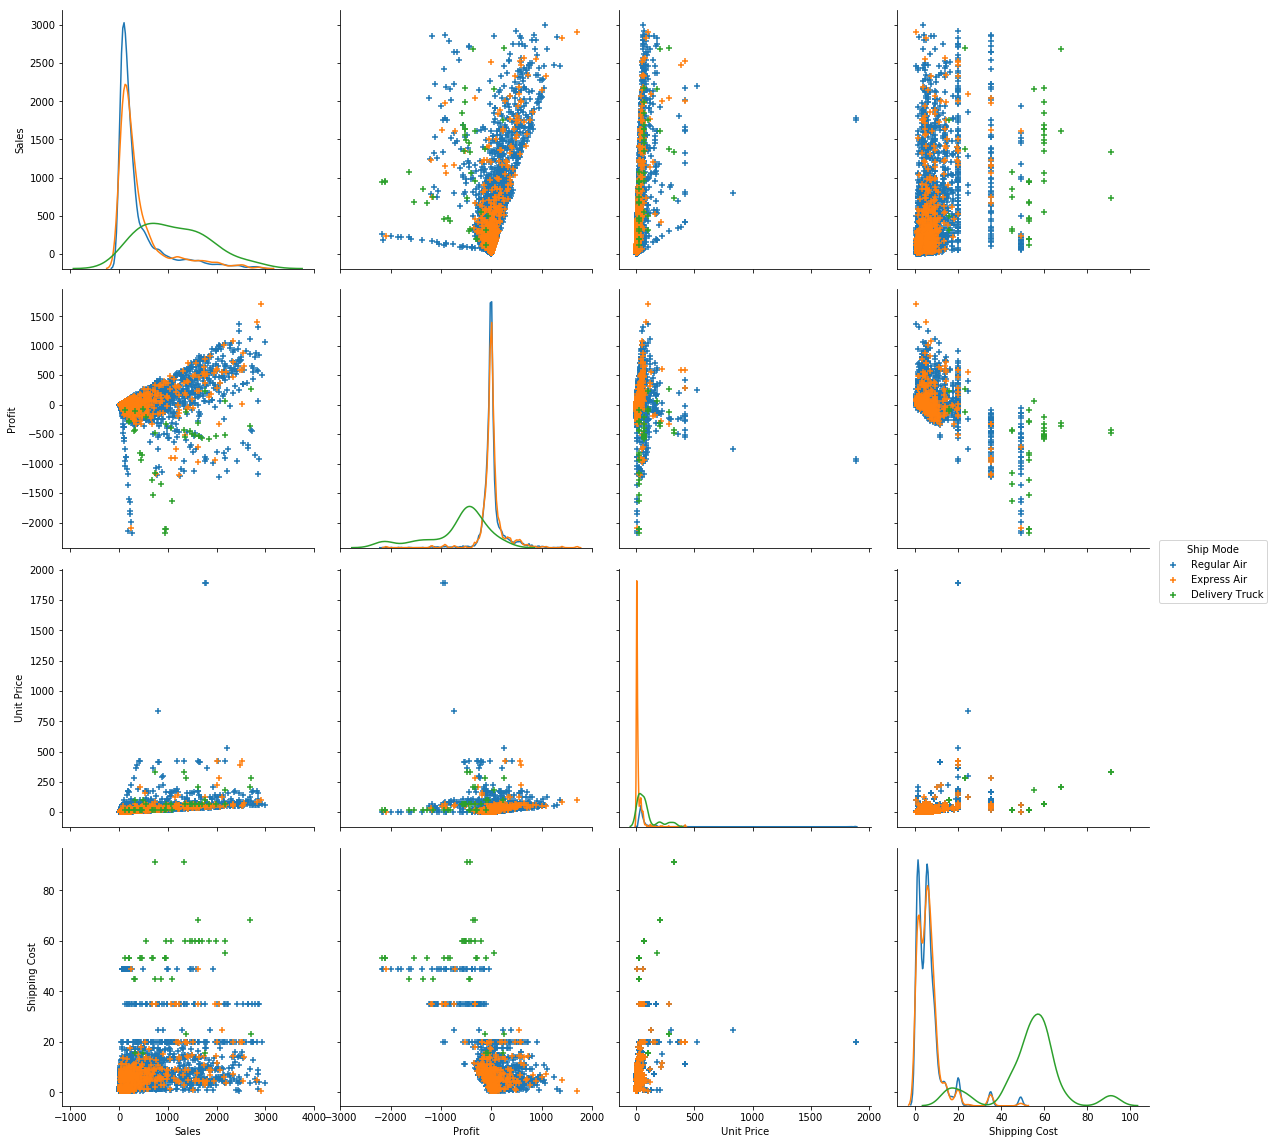

In [121]:
sns.pairplot(data_offsupplies[cols], diag_kind="kde", size=4, hue = 'Ship Mode', markers="+")

In [108]:
data_offsupplies.columns

Index(['Order ID', 'Order Date', 'Order Priority', 'Order Quantity', 'Sales',
       'Discount', 'Ship Mode', 'Profit', 'Unit Price', 'Shipping Cost',
       'Customer Name', 'Province', 'Region', 'Customer Segment',
       'Product Category', 'Product Sub-Category', 'Product Base Margin',
       'Ship Date'],
      dtype='object')

#### Check for outliers in unit price?

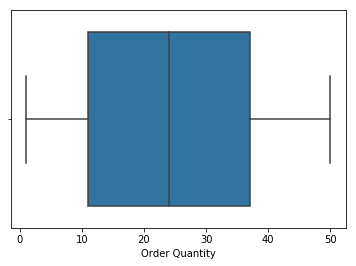

In [131]:
sns.boxplot(sales2['Order Quantity'])

In [124]:
sales2['Unit Price'].describe()

count    7007.000000
mean       39.398160
std        90.637534
min         0.990000
25%         5.980000
50%        14.340000
75%        40.990000
max      2550.140000
Name: Unit Price, dtype: float64

In [125]:
sales2['Unit Price'].quantile([0.5, 0.7, 0.8, 0.9, 0.95, 0.99])

0.50     14.3400
0.70     34.9900
0.80     55.5000
0.90     99.9900
0.95    146.0500
0.99    319.4604
Name: Unit Price, dtype: float64

Take 99th percentile as cutoff, rest are outliers

Dealing with exceptionally high/low values - 

- Strategy 1: If you know these are junk/not reliable, then drop the values
- Strategy 2: If you know these are correct, but skew our analysis, then also drop them
- Strategy 3: If the values are gradually increasing, apply a log transformation
- Strategy 4: Cap the values to some upper limit

In [137]:
sales3 = sales2[sales2['Unit Price'] <=319].copy()

C:\Users\rahim.baig\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\rahim.baig\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


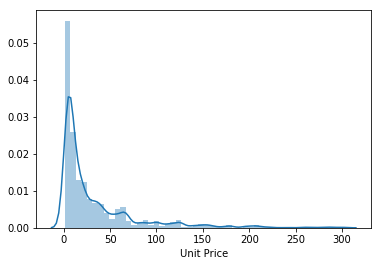

In [139]:
sns.distplot(sales3['Unit Price'])

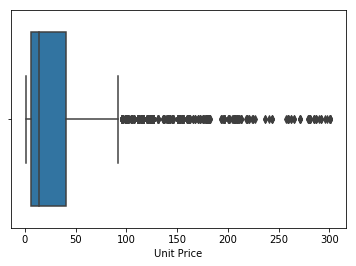

In [140]:
sns.boxplot(sales3['Unit Price'])

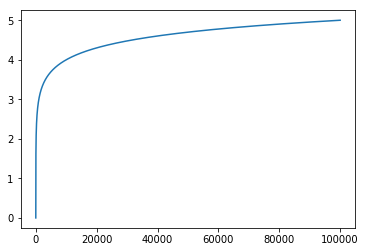

In [143]:
plt.plot(np.log10(np.arange(1,100000)))

In [144]:
sales3['Unit_Price_Log'] = np.log1p(sales3['Unit Price'])

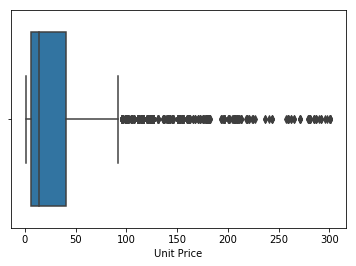

In [140]:
sns.boxplot(sales3['Unit Price'])

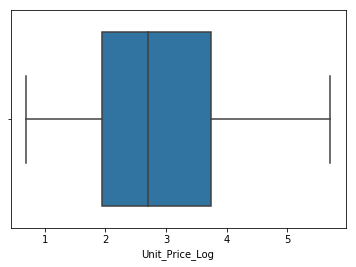

In [145]:
sns.boxplot(sales3.Unit_Price_Log)

Capping to an upper value

In [219]:
sales3.Sales.head()

0    261.54
1    289.53
2    394.27
3    146.69
4    289.53
Name: Sales, dtype: float64

In [ ]:
if value > 300, use 300 otherwise use value

In [221]:
min(1000, 300)

300

In [224]:
np.minimum(sales3.Sales, 300).head()

0    261.54
1    289.53
2    300.00
3    146.69
4    289.53
Name: Sales, dtype: float64

In [155]:
?plt.subplot(211)

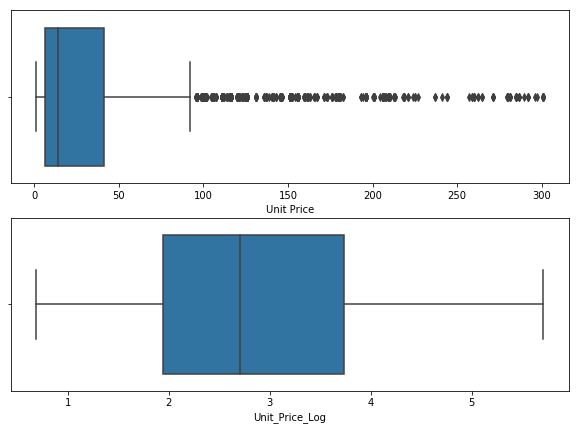

In [158]:
plt.figure(figsize=[10,7])
plt.subplot(2,1,1)
sns.boxplot(sales3['Unit Price'])
plt.subplot(2,1,2)
sns.boxplot(sales3.Unit_Price_Log)

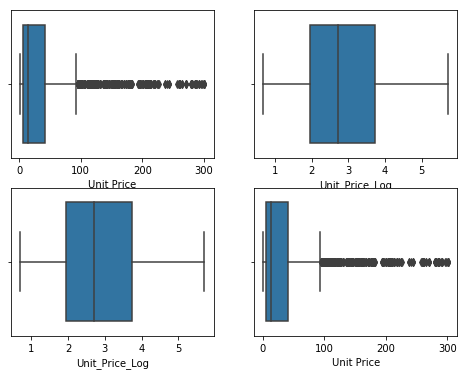

In [161]:
plt.figure(figsize=[8,6])
plt.subplot(2,2,1)
sns.boxplot(sales3['Unit Price'])
plt.subplot(2,2,2)
sns.boxplot(sales3.Unit_Price_Log)
plt.subplot(2,2,4)
sns.boxplot(sales3['Unit Price'])
plt.subplot(2,2,3)
sns.boxplot(sales3.Unit_Price_Log)

In [ ]:
sns.boxplot(sales3.Unit_Price_Log)

In [149]:
?sns.regplot

C:\Users\rahim.baig\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


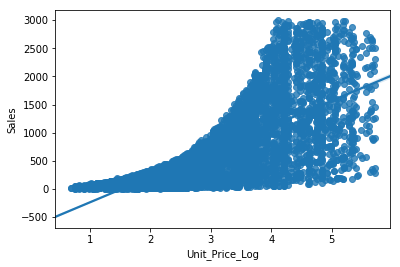

In [152]:
sns.regplot(x=sales3['Unit_Price_Log'], y=sales3['Sales'])

### Create missing values in a column

Create 10 missing values in a particular column

In [163]:
sales3.head()

,Order ID,Order Date,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,Unit Price,Shipping Cost,Customer Name,Province,Region,Customer Segment,Product Category,Product Sub-Category,Product Base Margin,Ship Date,Unit_Price_Log
0,3,13-10-2010,Low,6,261.54,0.04,Regular Air,-213.25,38.94,35.00,Muhammed MacIntyre,Nunavut,Nunavut,Small Business,Office Supplies,Storage & Organization,0.80,20-10-2010,3.687378
1,293,01-10-2012,High,27,244.57,0.01,Regular Air,46.71,8.69,2.99,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Binders and Binder Accessories,0.39,03-10-2012,2.271094
2,515,28-08-2010,Not Specified,19,394.27,0.08,Regular Air,30.94,21.78,5.94,Carlos Soltero,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,0.50,30-08-2010,3.125883
3,515,28-08-2010,Not Specified,21,146.69,0.05,Regular Air,4.43,6.64,4.95,Carlos Soltero,Nunavut,Nunavut,Consumer,Furniture,Office Furnishings,0.37,30-08-2010,2.033398
4,613,17-06-2011,High,12,93.54,0.03,Regular Air,-54.04,7.30,7.72,Carl Jackson,Nunavut,Nunavut,Corporate,Office Supplies,Binders and Binder Accessories,0.38,17-06-2011,2.116256


In [164]:
sales3.iloc[1,4] = 10

In [167]:
sales3.head()

,Order ID,Order Date,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,Unit Price,Shipping Cost,Customer Name,Province,Region,Customer Segment,Product Category,Product Sub-Category,Product Base Margin,Ship Date,Unit_Price_Log
0,3,13-10-2010,Low,6,261.54,0.04,Regular Air,-213.25,38.94,35.00,Muhammed MacIntyre,Nunavut,Nunavut,Small Business,Office Supplies,Storage & Organization,0.80,20-10-2010,3.687378
1,293,01-10-2012,High,27,NaN,0.01,Regular Air,46.71,8.69,2.99,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Binders and Binder Accessories,0.39,03-10-2012,2.271094
2,515,28-08-2010,Not Specified,19,394.27,0.08,Regular Air,30.94,21.78,5.94,Carlos Soltero,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,0.50,30-08-2010,3.125883
3,515,28-08-2010,Not Specified,21,146.69,0.05,Regular Air,4.43,6.64,4.95,Carlos Soltero,Nunavut,Nunavut,Consumer,Furniture,Office Furnishings,0.37,30-08-2010,2.033398
4,613,17-06-2011,High,12,93.54,0.03,Regular Air,-54.04,7.30,7.72,Carl Jackson,Nunavut,Nunavut,Corporate,Office Supplies,Binders and Binder Accessories,0.38,17-06-2011,2.116256


In [166]:
sales3.iloc[1,4] = None

In [168]:
import random

In [202]:
rand_ind = [random.randint(1,1000) for i in range(20)]
rand_ind

[745,
 117,
 320,
 902,
 318,
 228,
 429,
 705,
 253,
 480,
 793,
 7,
 470,
 728,
 641,
 667,
 572,
 4,
 763,
 719]

In [203]:
sales3.iloc[rand_ind,4] = None

In [205]:
sales3.head()

,Order ID,Order Date,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,Unit Price,Shipping Cost,Customer Name,Province,Region,Customer Segment,Product Category,Product Sub-Category,Product Base Margin,Ship Date,Unit_Price_Log
0,3,13-10-2010,Low,6,261.54,0.04,Regular Air,-213.25,38.94,35.00,Muhammed MacIntyre,Nunavut,Nunavut,Small Business,Office Supplies,Storage & Organization,0.80,20-10-2010,3.687378
1,293,01-10-2012,High,27,NaN,0.01,Regular Air,46.71,8.69,2.99,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Binders and Binder Accessories,0.39,03-10-2012,2.271094
2,515,28-08-2010,Not Specified,19,394.27,0.08,Regular Air,30.94,21.78,5.94,Carlos Soltero,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,0.50,30-08-2010,3.125883
3,515,28-08-2010,Not Specified,21,146.69,0.05,Regular Air,4.43,6.64,4.95,Carlos Soltero,Nunavut,Nunavut,Consumer,Furniture,Office Furnishings,0.37,30-08-2010,2.033398
4,613,17-06-2011,High,12,NaN,0.03,Regular Air,-54.04,7.30,7.72,Carl Jackson,Nunavut,Nunavut,Corporate,Office Supplies,Binders and Binder Accessories,0.38,17-06-2011,2.116256


In [207]:
sales3.Sales.isnull().sum()

21

### Handling missing values

1. Does the data being missing have a meaning to it? E.g. missing may mean 0 in sales data; replace missing values by 0
2. Very few in number, say 0.1%, which can't be recovered - drop the rows
3. Slightly more, say 10%, which can't be recovered - estimate - e.g. mean
4. Even more, say 60%, which can't be recovered
    + drop the column!
    + fill mean value, but also add a special variable indicating these are missing

Replace NAs with 0

In [211]:
sales3.Sales.fillna(0).head(10)

0     261.54
1       0.00
2     394.27
3     146.69
4       0.00
5     228.41
6     196.85
7       0.00
8     716.84
9    1474.33
Name: Sales, dtype: float64

Replace NAs with the mean of the column

In [215]:
median_sales = sales3.Sales.median()
median_sales

289.53

In [216]:
sales3.Sales.fillna(median_sales).head(10)

0     261.54
1     289.53
2     394.27
3     146.69
4     289.53
5     228.41
6     196.85
7     289.53
8     716.84
9    1474.33
Name: Sales, dtype: float64

In [217]:
sales3.Sales = sales3.Sales.fillna(median_sales)

In [218]:
sales3.Sales.head(10)

0     261.54
1     289.53
2     394.27
3     146.69
4     289.53
5     228.41
6     196.85
7     289.53
8     716.84
9    1474.33
Name: Sales, dtype: float64

### Scaling - minmax scaling

In [225]:
sales3.Sales.describe()

count    6936.000000
mean      601.433354
std       689.435860
min         2.240000
25%       120.202500
50%       289.530000
75%       848.947750
max      2996.930000
Name: Sales, dtype: float64

(x - min)/(max - min)

In [226]:
from sklearn.preprocessing import MinMaxScaler

In [227]:
?MinMaxScaler

In [228]:
scaler = MinMaxScaler()

In [233]:
scaler.fit(sales3.Sales.values.reshape(-1,1))

MinMaxScaler(copy=True, feature_range=(0, 1))

In [235]:
scaler.data_min_

array([2.24])

In [237]:
scaler.data_max_

array([2996.93])

In [238]:
sales3['Sales_scaled'] = scaler.transform(sales3.Sales.values.reshape(-1,1))

In [239]:
sales3.Sales_scaled.describe()

count    6936.000000
mean        0.200085
std         0.230219
min         0.000000
25%         0.039391
50%         0.095933
75%         0.282736
max         1.000000
Name: Sales_scaled, dtype: float64

In [240]:
sales3.Sales.replace(None, "")